水素原子の1S波動関数$\Psi (r,\theta,\phi) = \frac{r}{a} \exp (-\frac{r}{2a}) \exp (i\phi)\sin(\theta)$を使って、$H\Psi = E \Psi$ から $H\Psi / \Psi = E$ を確認する

In [1]:
from sympy import *

In [2]:
init_printing()

極座標の定義

In [3]:
r = Symbol('r',real=True, positive=True)
θ = Symbol('theta',real=True, positive=True,domain=Interval(0,pi))
ϕ = Symbol('\phi',real=True, positive=True,domain=Interval(0,2*pi))

In [4]:
x = r * sin(θ) * cos(ϕ)
y = r * sin(θ) * sin(ϕ)
z = r * cos(θ)

In [5]:
xyz = [x, y, z]
xyz

In [6]:
rtp = [r, θ, ϕ]
rtp

In [7]:
a = Symbol('a')

水素原子の1S波動関数$\psi$を入れてやる

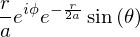

In [8]:
ψ =r/a * exp (-r/(2*a)) * exp (I*ϕ)* sin(θ)
ψ

クーロンポテンシャル部分 $U \psi $ を先に計算する

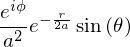

In [9]:
Uψ = (1/r) * (1/a) * ψ
Uψ

以下は、Laplacianの計算。まず、ヤコビアン$J$を求める

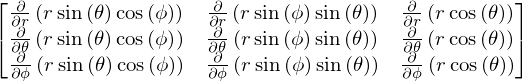

In [10]:
J = Matrix(3 , 3 , [Derivative(c1 , c2) for c2 in rtp for c1 in xyz])
J

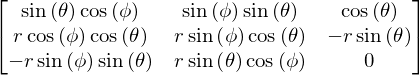

In [11]:
J = J.doit()
J

$ dx dy dz = J^{-1} dr d\theta d\phi$ だから、逆行列が必要となる

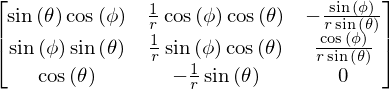

In [12]:
InvJ = simplify(J.inv())
InvJ

In [13]:
a = Matrix(3 , 1 , [Derivative(ψ , c) for c in rtp])

Laplacian = $\nabla^2$ = $L^2$ (原子単位) = grad div $\psi$ 

In [14]:
gradψ = InvJ*a

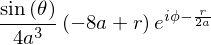

In [15]:
L2ψ=simplify(sum([ (InvJ * Matrix(3,1,[ Derivative(gradψ[i],e) for e in rtp ]).doit())[i] for i in range(3) ]))
L2ψ

$H\psi$を求めてやる

In [16]:
Hψ = -0.5 * L2ψ - Uψ

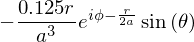

In [17]:
simplify(Hψ)

実際に定数になっているだろうか? 

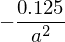

In [18]:
simplify(Hψ / ψ)

確かに定数になった